LINEAR REGRESSION
THE NORMAL EQUATION

In [2]:
import numpy as np
import sys
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

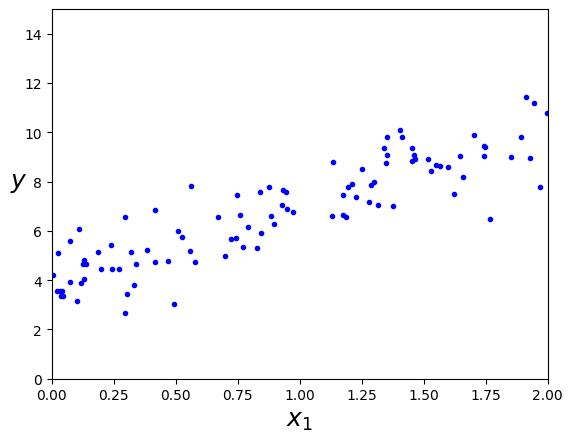

In [3]:
plt.plot(x,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [7]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.91871423],
       [3.10489675]])

In [12]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
print(x_new_b)
y_predict=x_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 3.91871423],
       [10.12850773]])

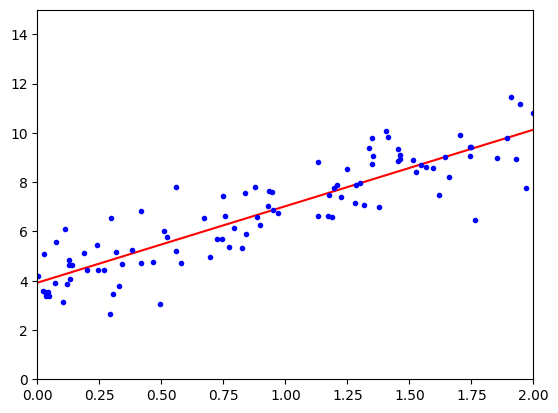

In [9]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.91871423]), array([[3.10489675]]))

In [11]:
lin_reg.predict(x_new)

array([[ 3.91871423],
       [10.12850773]])

In [13]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[3.91871423],
       [3.10489675]])

In [14]:
np.linalg.pinv(x_b).dot(y)

array([[3.91871423],
       [3.10489675]])

In [17]:
u,s,v=np.linalg.svd(x_b)
s

array([14.18306741,  4.23540863])

GRADIENT DESCENT

In [18]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[3.91871423],
       [3.10489675]])

In [19]:
x_new_b.dot(theta)

array([[ 3.91871423],
       [10.12850773]])

In [20]:
theta_path_bgd=[]
def plot_gradient_descent(theta,eta,theta_path=None):
    m=len(x_b)
    plt.plot(x,y,'b.')
    n_iterations=1000
    for iteration in range(n_iterations):
        if iteration<10:
            y_predict=x_new_b.dot(theta)
            style='b-' if iteration>0 else"r--"
            plt.plot(x_new,y_predict,style)
        gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
        theta=theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$eta={}$".format(eta),fontsize=16)


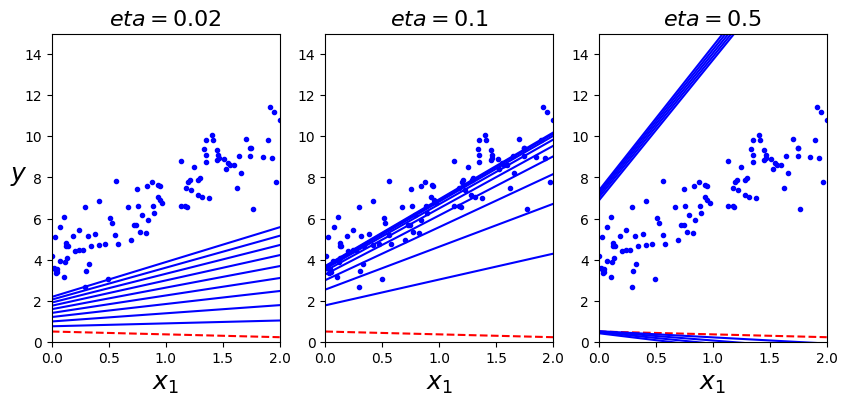

In [21]:
np.random.seed(42)
theta=np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131);plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta,eta=0.5)
plt.show()

STOCHASTIC GRADIENT DESCENT

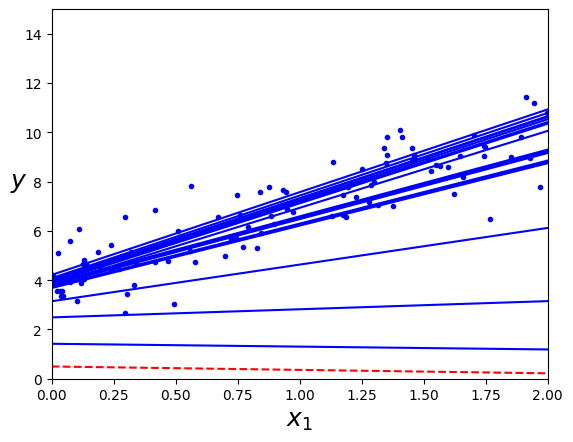

In [27]:
theta_path_sgd=[]
m=len(x_b)
np.random.seed(42)
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict=x_new_b.dot(theta)
            style="b-" if i>0 else "r--"
            plt.plot(x_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(x,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [28]:
theta


array([[3.93014494],
       [3.07580091]])

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [32]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.9256186]), array([3.11948987]))

Mini-batch Gradient descent

In [33]:
theta_path_mgd=[]
n_iterations=50
minibatch_size=20
np.random.seed(42)
theta=np.random.randn(2,1)
t0,t1=200,1000
def learning_schedule(t):
    return t0/(t+t1)
t=0
for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    x_b_shuffled=x_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi=x_b_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)

In [34]:
theta

array([[3.93876635],
       [3.11993194]])

In [35]:
theta_path_bgd=np.array(theta_path_bgd)
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)


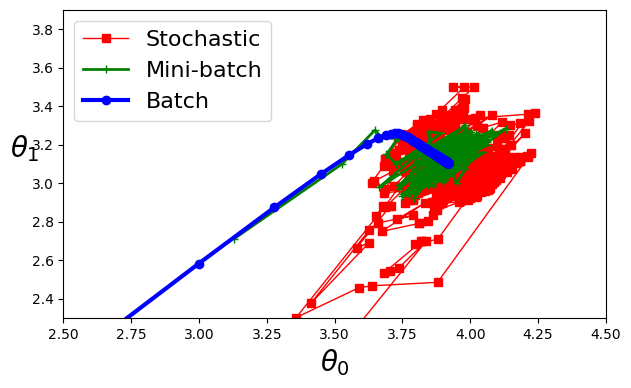

In [37]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="Mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:, 1],"b-o",linewidth=3,label="Batch")
plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$ ",fontsize=20,rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()